# Data Analysis with sample data

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
corona_response= pd.read_csv('C:/datasets/response.csv')
corona_response.head()

,Country,Total_Cases,New_Cases,Total_Deaths,New_Deaths,Total_Recovered,Active_Cases,Serious/Critical,Tot_Cases,Deaths,Total_Tests,Tests,Continents
0,World,9067824,"28,887",471040,"1,436",4850718.0,3746066.0,54740.0,"1,163",60.4,NaN,NaN,All
1,USA,2356715,58,122248,1,980367.0,1254100.0,16477.0,"7,121",369,"28,492,770","86,093",North America
2,Brazil,1086990,NaN,50659,NaN,579226.0,457105.0,8318.0,"5,115",238,"2,430,347","11,436",South America
3,Russia,592280,"7,600",8206,95,344416.0,239658.0,2300.0,"4,059",56,"17,200,000","117,862",Europe
4,India,426910,NaN,13703,NaN,237252.0,175955.0,8944.0,309,10,"6,950,493","5,038",Asia


In [3]:
corona_response.tail()

,Country,Total_Cases,New_Cases,Total_Deaths,New_Deaths,Total_Recovered,Active_Cases,Serious/Critical,Tot_Cases,Deaths,Total_Tests,Tests,Continents
211,Caribbean Netherlands,7,NaN,,NaN,7.0,0.0,NaN,267,NaN,424,"16,173",North America
212,St. Barth,6,NaN,,NaN,6.0,0.0,NaN,608,NaN,152,"15,391",North America
213,Anguilla,3,NaN,,NaN,3.0,0.0,NaN,200,NaN,93,"6,200",North America
214,Saint Pierre Miquelon,1,NaN,,NaN,1.0,0.0,NaN,173,NaN,NaN,NaN,North America
215,China,83396,18,4634,NaN,78413.0,349.0,10.0,58,3,NaN,NaN,Asia


In [4]:
corona_response.shape

(216, 13)

In [5]:
corona_response.describe()

,Total_Cases,Total_Recovered,Active_Cases,Serious/Critical
count,2.160000e+02,2.110000e+02,2.120000e+02,132.000000
mean,8.396133e+04,4.500278e+04,3.338094e+04,829.393939
std,6.421554e+05,3.438094e+05,2.729285e+05,5061.856394
min,1.000000e+00,1.000000e+00,0.000000e+00,1.000000
25%,2.302500e+02,1.405000e+02,3.500000e+01,2.000000
50%,1.823000e+03,9.300000e+02,4.365000e+02,10.000000
75%,1.498525e+04,8.248000e+03,4.461000e+03,102.750000
max,9.067824e+06,4.850718e+06,3.746066e+06,54740.000000


In [6]:
corona_response.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 216 entries, 0 to 215
Data columns (total 13 columns):
Country             216 non-null object
Total_Cases         216 non-null int64
New_Cases           47 non-null object
Total_Deaths        216 non-null object
New_Deaths          22 non-null object
Total_Recovered     211 non-null float64
Active_Cases        212 non-null float64
Serious/Critical    132 non-null float64
Tot_Cases           214 non-null object
Deaths              184 non-null object
Total_Tests         191 non-null object
Tests               191 non-null object
Continents          214 non-null object
dtypes: float64(3), int64(1), object(9)
memory usage: 22.1+ KB


In [7]:
# checking for duplicated values
corona_response.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
211    False
212    False
213    False
214    False
215    False
Length: 216, dtype: bool

In [8]:
corona_response['Continents'].value_counts()

Africa               57
Asia                 49
Europe               48
North America        39
South America        14
Australia/Oceania     6
All                   1
Name: Continents, dtype: int64

In [9]:
corona_response.iloc[215,:]


Country             China
Total_Cases         83396
New_Cases              18
Total_Deaths        4634 
New_Deaths            NaN
Total_Recovered     78413
Active_Cases          349
Serious/Critical       10
Tot_Cases              58
Deaths                  3
Total_Tests           NaN
Tests                 NaN
Continents           Asia
Name: 215, dtype: object

In [10]:

corona_response.groupby('Continents')['Total_Cases'].mean()

Continents
Africa               5.430228e+03
All                  9.067824e+06
Asia                 3.904433e+04
Australia/Oceania    1.515667e+03
Europe               4.833019e+04
North America        7.014346e+04
South America        1.271336e+05
Name: Total_Cases, dtype: float64

In [11]:
continent_frame =corona_response.set_index(['Continents']) 

In [12]:
continent_frame.head()

,Country,Total_Cases,New_Cases,Total_Deaths,New_Deaths,Total_Recovered,Active_Cases,Serious/Critical,Tot_Cases,Deaths,Total_Tests,Tests
Continents,,,,,,,,,,,,
All,World,9067824,"28,887",471040,"1,436",4850718.0,3746066.0,54740.0,"1,163",60.4,NaN,NaN
North America,USA,2356715,58,122248,1,980367.0,1254100.0,16477.0,"7,121",369,"28,492,770","86,093"
South America,Brazil,1086990,NaN,50659,NaN,579226.0,457105.0,8318.0,"5,115",238,"2,430,347","11,436"
Europe,Russia,592280,"7,600",8206,95,344416.0,239658.0,2300.0,"4,059",56,"17,200,000","117,862"
Asia,India,426910,NaN,13703,NaN,237252.0,175955.0,8944.0,309,10,"6,950,493","5,038"


# Dealing with missing values

In [13]:
corona_response.shape

(216, 13)

In [14]:
corona_response.isnull()
# several columns have missing values

,Country,Total_Cases,New_Cases,Total_Deaths,New_Deaths,Total_Recovered,Active_Cases,Serious/Critical,Tot_Cases,Deaths,Total_Tests,Tests,Continents
0,False,False,False,False,False,False,False,False,False,False,True,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,True,False,True,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,True,False,True,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
211,False,False,True,False,True,False,False,True,False,True,False,False,False
212,False,False,True,False,True,False,False,True,False,True,False,False,False
213,False,False,True,False,True,False,False,True,False,True,False,False,False
214,False,False,True,False,True,False,False,True,False,True,True,True,False


In [15]:
corona_response[corona_response['Total_Deaths']==''].index
# shows the existence of several white spaces

Int64Index([], dtype='int64')

In [16]:
response =corona_response.replace(r'^\s*$',np.nan,regex=True)
# replacing whitespaces with Nan this data is easier to work with compared to whitespaces as empty data
response

,Country,Total_Cases,New_Cases,Total_Deaths,New_Deaths,Total_Recovered,Active_Cases,Serious/Critical,Tot_Cases,Deaths,Total_Tests,Tests,Continents
0,World,9067824,"28,887",471040,"1,436",4850718.0,3746066.0,54740.0,"1,163",60.4,NaN,NaN,All
1,USA,2356715,58,122248,1,980367.0,1254100.0,16477.0,"7,121",369,"28,492,770","86,093",North America
2,Brazil,1086990,NaN,50659,NaN,579226.0,457105.0,8318.0,"5,115",238,"2,430,347","11,436",South America
3,Russia,592280,"7,600",8206,95,344416.0,239658.0,2300.0,"4,059",56,"17,200,000","117,862",Europe
4,India,426910,NaN,13703,NaN,237252.0,175955.0,8944.0,309,10,"6,950,493","5,038",Asia
...,...,...,...,...,...,...,...,...,...,...,...,...,...
211,Caribbean Netherlands,7,NaN,NaN,NaN,7.0,0.0,NaN,267,NaN,424,"16,173",North America
212,St. Barth,6,NaN,NaN,NaN,6.0,0.0,NaN,608,NaN,152,"15,391",North America
213,Anguilla,3,NaN,NaN,NaN,3.0,0.0,NaN,200,NaN,93,"6,200",North America
214,Saint Pierre Miquelon,1,NaN,NaN,NaN,1.0,0.0,NaN,173,NaN,NaN,NaN,North America


# Data Visualization to gather insights

# working with the total cases and their distribution among the continents

In [17]:
response["Total_Cases"].isnull().sum()
# clean data no missing values

0

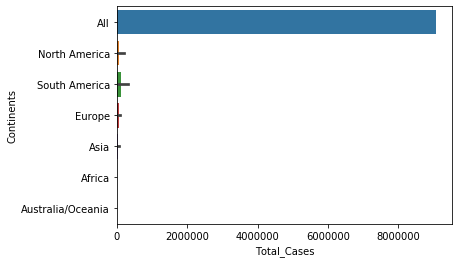

In [18]:
sns.barplot(x='Total_Cases',y= 'Continents', data = response)

In [19]:
# removing the outliers (world all data) to get clear total_cases data distributiion in the different continents 
cases_data = response[corona_response["Total_Cases"] <= 2000000]


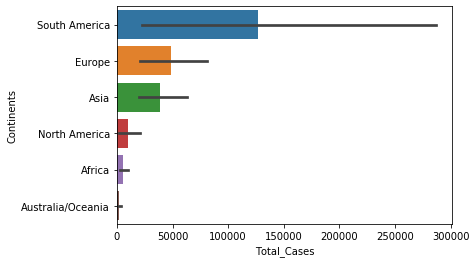

In [20]:
sns.barplot(x='Total_Cases',y= 'Continents', data = cases_data)

# Active_Cases around the globe

In [21]:
corona_response["Active_Cases"].isnull().sum()
# missing data

4

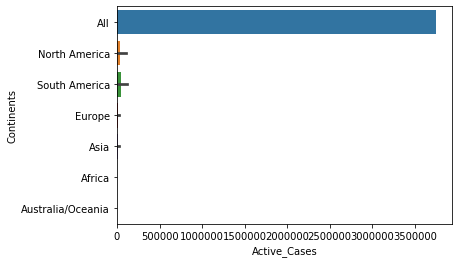

In [22]:
sns.barplot(x='Active_Cases',y='Continents', data=corona_response)

In [23]:
# removing the  (world all data) to get clear total_cases data distributiion in the different continents 
active_data = response[response["Active_Cases"] <= 500000]


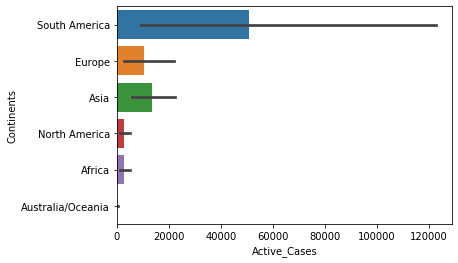

In [24]:
sns.barplot(x='Active_Cases',y= 'Continents', data = active_data)

# Total_recovered data visualization

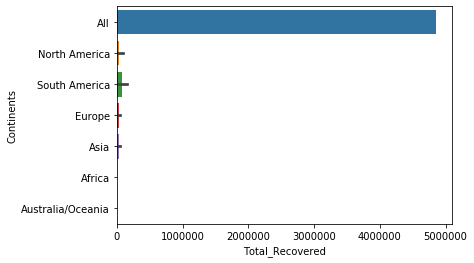

In [25]:
sns.barplot(x='Total_Recovered',y= 'Continents', data = response)

In [26]:
recovered_data = response[response["Total_Recovered"] <= 1000000]

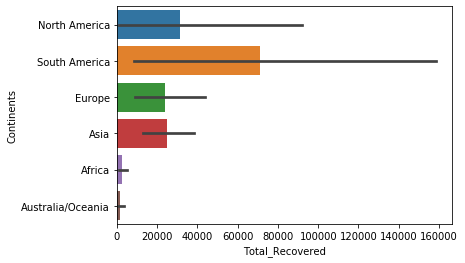

In [27]:
sns.barplot(x='Total_Recovered',y= 'Continents', data = recovered_data)

# Ratio of Recovery

In [28]:
response_rat=response.groupby(['Continents','Country'])['Total_Recovered'].transform('sum')
response['ratio']=response.Total_Cases.div(response_rat)

In [29]:
#response_rat

In [30]:
response['ratio']=response.Total_Cases.div(response_rat)

In [31]:
response

,Country,Total_Cases,New_Cases,Total_Deaths,New_Deaths,Total_Recovered,Active_Cases,Serious/Critical,Tot_Cases,Deaths,Total_Tests,Tests,Continents,ratio
0,World,9067824,"28,887",471040,"1,436",4850718.0,3746066.0,54740.0,"1,163",60.4,NaN,NaN,All,1.869378
1,USA,2356715,58,122248,1,980367.0,1254100.0,16477.0,"7,121",369,"28,492,770","86,093",North America,2.403911
2,Brazil,1086990,NaN,50659,NaN,579226.0,457105.0,8318.0,"5,115",238,"2,430,347","11,436",South America,1.876625
3,Russia,592280,"7,600",8206,95,344416.0,239658.0,2300.0,"4,059",56,"17,200,000","117,862",Europe,1.719665
4,India,426910,NaN,13703,NaN,237252.0,175955.0,8944.0,309,10,"6,950,493","5,038",Asia,1.799395
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211,Caribbean Netherlands,7,NaN,NaN,NaN,7.0,0.0,NaN,267,NaN,424,"16,173",North America,1.000000
212,St. Barth,6,NaN,NaN,NaN,6.0,0.0,NaN,608,NaN,152,"15,391",North America,1.000000
213,Anguilla,3,NaN,NaN,NaN,3.0,0.0,NaN,200,NaN,93,"6,200",North America,1.000000
214,Saint Pierre Miquelon,1,NaN,NaN,NaN,1.0,0.0,NaN,173,NaN,NaN,NaN,North America,1.000000


In [32]:
response_rat_grp=response.groupby(['Continents','Country'])['Total_Cases','Total_Recovered','ratio'].mean()

In [33]:
response_rat_grp

Total_Cases  Total_Recovered     ratio
Continents    Country                                             
Africa        Algeria             11771           8422.0  1.397649
              Angola                183             77.0  2.376623
              Benin                 765            253.0  3.023715
              Botswana               89             25.0  3.560000
              Burkina Faso          903            814.0  1.109337
...                                 ...              ...       ...
South America Paraguay             1379            871.0  1.583238
              Peru               254936         141967.0  1.795741
              Suriname              314            106.0  2.962264
              Uruguay               876            814.0  1.076167
              Venezuela            3917            835.0  4.691018

[214 rows x 3 columns]

# Total_Deaths visualization

In [34]:
response["Total_Deaths"].isnull().sum()
# missing data

30

In [35]:
# fill in the empty data with a default value
response['Total_Deaths'].fillna(0, inplace = True)

In [36]:
response['Total_Deaths'].isnull().sum()

0

In [37]:
type(response['Total_Deaths'])

pandas.core.series.Series

In [38]:
response.Total_Deaths= response.Total_Deaths.astype('int64')
# dealing with strings within the column

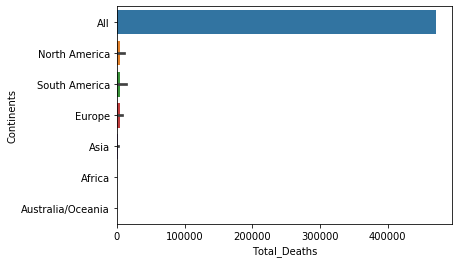

In [39]:
sns.barplot(x='Total_Deaths',y='Continents', data=response)

In [40]:
deaths_data = response[response['Total_Deaths'] <= 100000]

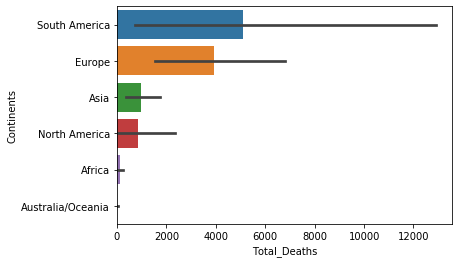

In [41]:
sns.barplot(x='Total_Deaths',y= 'Continents', data = deaths_data)

# serious cases data visualization

In [42]:
response["Serious/Critical"].isnull().sum()

84

In [43]:
response['Serious/Critical'].fillna(0, inplace = True)

In [44]:
response["Serious/Critical"].isnull().sum()

0

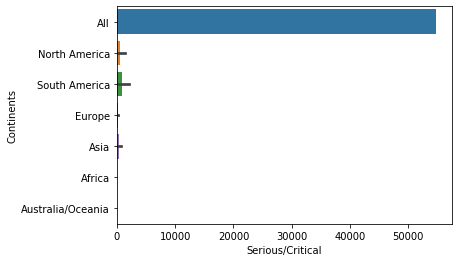

In [45]:
sns.barplot(x='Serious/Critical',y='Continents', data=response)

In [46]:
serious_data = response[response["Serious/Critical"] <= 10000]

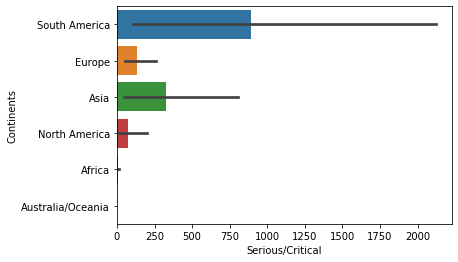

In [47]:
sns.barplot(x='Serious/Critical',y= 'Continents', data = serious_data)

# Total_tests done 

In [48]:
response["Total_Tests"].isnull().sum()
# there is significant amount of missing data

25

In [49]:
response['Total_Tests'].fillna(0,inplace =True)

In [50]:
response["Total_Tests"].isnull().sum()

0

In [51]:
type(response['Total_Tests'])

pandas.core.series.Series

In [52]:
response.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 216 entries, 0 to 215
Data columns (total 14 columns):
Country             216 non-null object
Total_Cases         216 non-null int64
New_Cases           47 non-null object
Total_Deaths        216 non-null int64
New_Deaths          22 non-null object
Total_Recovered     211 non-null float64
Active_Cases        212 non-null float64
Serious/Critical    216 non-null float64
Tot_Cases           214 non-null object
Deaths              184 non-null object
Total_Tests         216 non-null object
Tests               191 non-null object
Continents          214 non-null object
ratio               214 non-null float64
dtypes: float64(4), int64(2), object(8)
memory usage: 23.8+ KB


In [53]:
# changing from object to float
response['Total_Tests']=response['Total_Tests'].astype(str).str.replace(',','').astype(float)

In [54]:
response.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 216 entries, 0 to 215
Data columns (total 14 columns):
Country             216 non-null object
Total_Cases         216 non-null int64
New_Cases           47 non-null object
Total_Deaths        216 non-null int64
New_Deaths          22 non-null object
Total_Recovered     211 non-null float64
Active_Cases        212 non-null float64
Serious/Critical    216 non-null float64
Tot_Cases           214 non-null object
Deaths              184 non-null object
Total_Tests         216 non-null float64
Tests               191 non-null object
Continents          214 non-null object
ratio               214 non-null float64
dtypes: float64(5), int64(2), object(7)
memory usage: 23.8+ KB


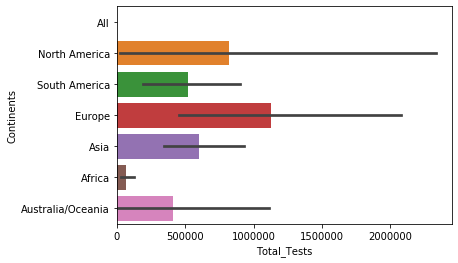

In [55]:
sns.barplot(x='Total_Tests',y='Continents', data=response)

# Grouping the data for easier readability

In [56]:
response_grp=response.groupby(['Continents','Country'])['Total_Cases','Total_Recovered','Active_Cases','Serious/Critical','Total_Deaths','Total_Tests'].mean()

In [57]:
response_grp

Total_Cases  Total_Recovered  Active_Cases  \
Continents    Country                                                    
Africa        Algeria             11771           8422.0        2504.0   
              Angola                183             77.0          97.0   
              Benin                 765            253.0         499.0   
              Botswana               89             25.0          63.0   
              Burkina Faso          903            814.0          36.0   
...                                 ...              ...           ...   
South America Paraguay             1379            871.0         495.0   
              Peru               254936         141967.0      104924.0   
              Suriname              314            106.0         200.0   
              Uruguay               876            814.0          37.0   
              Venezuela            3917            835.0        3049.0   

                            Serious/Critical  Total_Deaths  Total_Tests  
Continents    Country                                                    
Africa        Algeria                   41.0           845          0.0  
              Angola                     1.0             9      10000.0  
              Benin                      2.0            13      54306.0  
              Botswana                   1.0             1      33919.0  
              Burkina Faso               0.0            53          0.0  
...                                      ...           ...          ...  
South America Paraguay                   1.0            13      56992.0  
              Peru                    1143.0          8045    1504209.0  
              Suriname                   2.0             8       1165.0  
              Uruguay                    4.0            25      57289.0  
              Venezuela                  6.0            33    1149315.0  

[214 rows x 6 columns]

# Working with mean data to get global data distribution

In [58]:
cases_mean=response['Total_Cases'].mean()
recovered_mean = response['Total_Recovered'].mean()
active_mean = response['Active_Cases'].mean()
serious_mean = response['Serious/Critical'].mean()
deaths_mean = response['Total_Deaths'].mean()

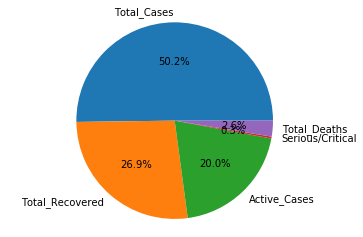

In [59]:
my_data = [cases_mean ,recovered_mean,active_mean,serious_mean,deaths_mean]
my_labels ='Total_Cases','Total_Recovered','Active_Cases','Serious/Critical','Total_Deaths'
plt.pie(my_data ,labels =my_labels,autopct='%1.1f%%')
plt.axis('equal')
plt.show()

In [60]:
world_data = response.iloc[0]

In [61]:
world_data

Country                   World
Total_Cases             9067824
New_Cases                28,887
Total_Deaths             471040
New_Deaths                1,436
Total_Recovered     4.85072e+06
Active_Cases        3.74607e+06
Serious/Critical          54740
Tot_Cases                 1,163
Deaths                     60.4
Total_Tests                   0
Tests                       NaN
Continents                  All
ratio                   1.86938
Name: 0, dtype: object

# Finding correlation in the data

In [62]:
corr_matrix =response.corr()
corr_matrix["Total_Cases"].sort_values(ascending = False)

Total_Cases         1.000000
Total_Recovered     0.997949
Active_Cases        0.996716
Total_Deaths        0.993837
Serious/Critical    0.990334
Total_Tests         0.241990
ratio              -0.008448
Name: Total_Cases, dtype: float64

In [63]:
# Experimenting with attribute combinations
response["calculated_Active_Cases"]= response["Total_Cases"]- response["Total_Recovered"]

# getting the correlation matrix
corr_matrix = response.corr()
corr_matrix["Total_Cases"].sort_values(ascending = False)
# displays the best corellation between the features

Total_Cases                1.000000
Total_Recovered            0.997949
calculated_Active_Cases    0.997428
Active_Cases               0.996716
Total_Deaths               0.993837
Serious/Critical           0.990334
Total_Tests                0.241990
ratio                     -0.008448
Name: Total_Cases, dtype: float64

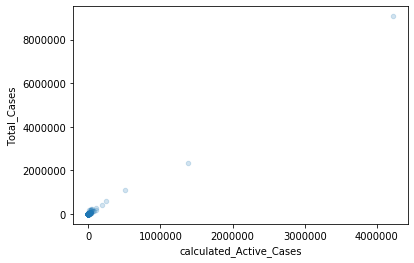

In [64]:
response.plot(kind = 'scatter',x ='calculated_Active_Cases',y='Total_Cases', alpha = 0.2)

In [65]:
calculated_data = response[response['calculated_Active_Cases'] <= 1000000]

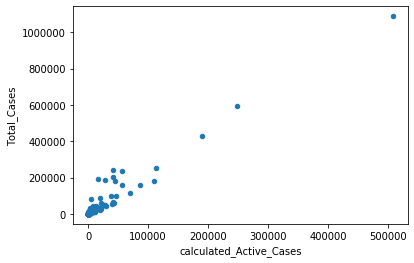

In [66]:
calculated_data.plot(kind = 'scatter',x ='calculated_Active_Cases',y='Total_Cases', alpha = 1)

# Working with data per Continent

In [67]:
Africa = response[response["Continents"] == 'Africa']

In [68]:
Africa

,Country,Total_Cases,New_Cases,Total_Deaths,New_Deaths,Total_Recovered,Active_Cases,Serious/Critical,Tot_Cases,Deaths,Total_Tests,Tests,Continents,ratio,calculated_Active_Cases
19,South Africa,97302,NaN,1930,NaN,51608.0,43764.0,208.0,"1,641",33,1328060.0,"22,400",Africa,1.885405,45694.0
25,Egypt,55233,NaN,2193,NaN,14736.0,38304.0,41.0,540,21,135000.0,"1,320",Africa,3.748168,40497.0
49,Nigeria,20244,NaN,518,NaN,6879.0,12847.0,7.0,98,3,113575.0,551,Africa,2.942870,13365.0
54,Ghana,14154,147,85,NaN,10473.0,3596.0,6.0,456,3,267286.0,"8,608",Africa,1.351475,3681.0
61,Cameroon,11892,NaN,303,NaN,7710.0,3879.0,28.0,448,11,0.0,NaN,Africa,1.542412,4182.0
62,Algeria,11771,NaN,845,NaN,8422.0,2504.0,41.0,269,19,0.0,NaN,Africa,1.397649,3349.0
64,Morocco,10079,102,214,NaN,8319.0,1546.0,7.0,273,6,548746.0,"14,872",Africa,1.211564,1760.0
68,Sudan,8580,NaN,521,NaN,3325.0,4734.0,0.0,196,12,401.0,9,Africa,2.580451,5255.0
69,Ivory Coast,7492,NaN,54,NaN,3068.0,4370.0,0.0,284,2,45152.0,"1,713",Africa,2.441982,4424.0
73,DRC,5924,98,135,5,856.0,4933.0,0.0,66,2,0.0,NaN,Africa,6.920561,5068.0


In [69]:
Africa["Total_Cases"].isnull().sum()

0

In [70]:
Africa_count = Africa.iloc[:20]

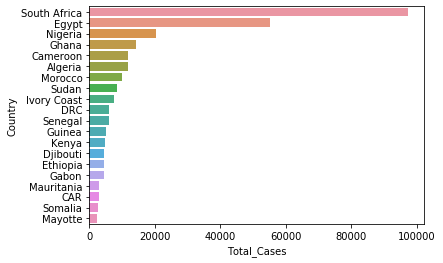

In [71]:
sns.barplot(x='Total_Cases',y= 'Country', data = Africa_count)
# number of cases in Africa With South Africa in the lead

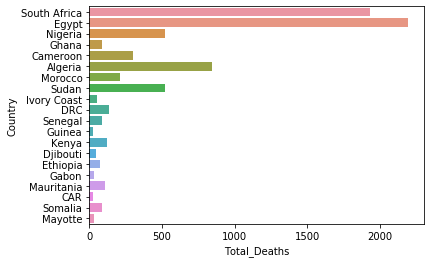

In [72]:
sns.barplot(x='Total_Deaths',y= 'Country', data = Africa_count)
# Number of deaths in some of the countries

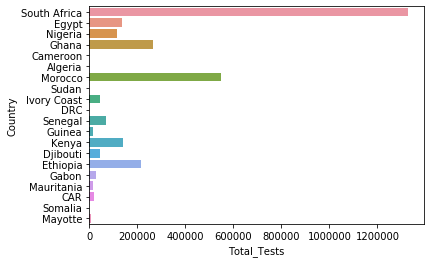

In [73]:
sns.barplot(x='Total_Tests',y= 'Country', data = Africa_count)

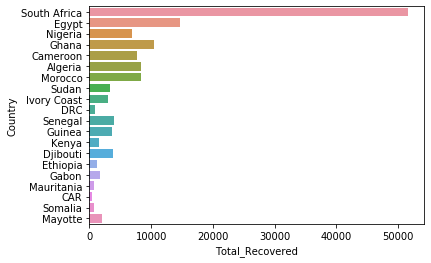

In [74]:
sns.barplot(x='Total_Recovered',y= 'Country', data = Africa_count)

# Australia's Data

In [75]:
Australia= response[response["Continents"] == 'Australia/Oceania']

In [76]:
Australia

,Country,Total_Cases,New_Cases,Total_Deaths,New_Deaths,Total_Recovered,Active_Cases,Serious/Critical,Tot_Cases,Deaths,Total_Tests,Tests,Continents,ratio,calculated_Active_Cases
70,Australia,7474,13,102,NaN,6903.0,469.0,2.0,293,4,2105974.0,"82,614",Australia/Oceania,1.082718,571.0
115,New Zealand,1513,2,22,NaN,1482.0,9.0,0.0,302,4,344519.0,"68,875",Australia/Oceania,1.020918,31.0
184,French Polynesia,60,NaN,0,NaN,60.0,0.0,0.0,214,NaN,4578.0,"16,299",Australia/Oceania,1.000000,0.0
194,New Caledonia,21,NaN,0,NaN,21.0,0.0,0.0,74,NaN,8049.0,"28,200",Australia/Oceania,1.000000,0.0
198,Fiji,18,NaN,0,NaN,18.0,0.0,0.0,20,NaN,4000.0,"4,463",Australia/Oceania,1.000000,0.0
210,Papua New Guinea,8,NaN,0,NaN,8.0,0.0,0.0,0.9,NaN,5281.0,591,Australia/Oceania,1.000000,0.0


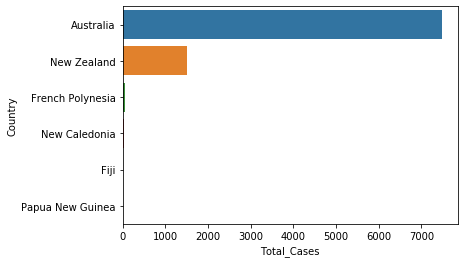

In [77]:
sns.barplot(x='Total_Cases',y= 'Country', data = Australia)

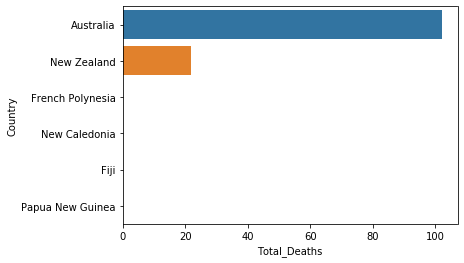

In [78]:
sns.barplot(x='Total_Deaths',y= 'Country', data = Australia)

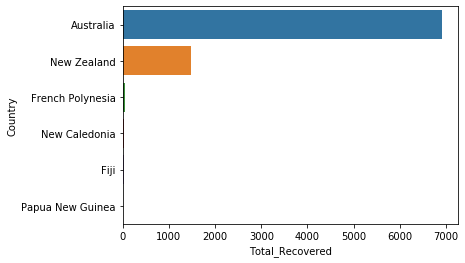

In [79]:
sns.barplot(x='Total_Recovered',y= 'Country', data = Australia)

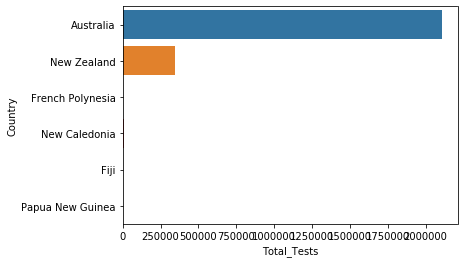

In [80]:
sns.barplot(x='Total_Tests',y= 'Country', data = Australia)

# South America's data

In [81]:
South_America = response[response["Continents"] == 'South America']

In [82]:
South_America

,Country,Total_Cases,New_Cases,Total_Deaths,New_Deaths,Total_Recovered,Active_Cases,Serious/Critical,Tot_Cases,Deaths,Total_Tests,Tests,Continents,ratio,calculated_Active_Cases
2,Brazil,1086990,NaN,50659,NaN,579226.0,457105.0,8318.0,"5,115",238,2430347.0,"11,436",South America,1.876625,507764.0
7,Peru,254936,NaN,8045,NaN,141967.0,104924.0,1143.0,"7,735",244,1504209.0,"45,639",South America,1.795741,112969.0
8,Chile,242355,NaN,4479,NaN,200569.0,37307.0,1996.0,"12,681",234,963708.0,"50,424",South America,1.208337,41786.0
21,Colombia,68652,NaN,2237,NaN,27360.0,39055.0,335.0,"1,350",44,604273.0,"11,879",South America,2.509211,41292.0
26,Ecuador,50640,NaN,4223,NaN,24991.0,21426.0,273.0,"2,872",239,139333.0,"7,901",South America,2.026329,25649.0
30,Argentina,42785,NaN,1011,NaN,12728.0,29046.0,353.0,947,22,279672.0,"6,190",South America,3.361486,30057.0
44,Bolivia,24388,876,773,33,5454.0,18161.0,71.0,"2,090",66,58789.0,"5,038",South America,4.471580,18934.0
86,Venezuela,3917,NaN,33,NaN,835.0,3049.0,6.0,138,1,1149315.0,"40,415",South America,4.691018,3082.0
95,French Guiana,2441,NaN,6,NaN,930.0,1505.0,14.0,"8,180",20,8061.0,"27,013",South America,2.624731,1511.0
117,Paraguay,1379,NaN,13,NaN,871.0,495.0,1.0,193,2,56992.0,"7,993",South America,1.583238,508.0


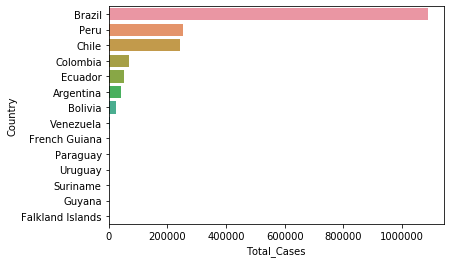

In [83]:
sns.barplot(x='Total_Cases',y= 'Country', data = South_America)

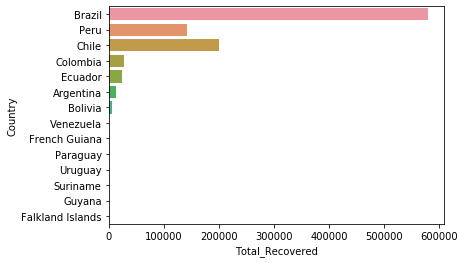

In [84]:
sns.barplot(x='Total_Recovered',y= 'Country', data = South_America)

# North America's data

In [85]:
North_America = response[response["Continents"] == 'North America']

In [86]:
North_America

,Country,Total_Cases,New_Cases,Total_Deaths,New_Deaths,Total_Recovered,Active_Cases,Serious/Critical,Tot_Cases,Deaths,Total_Tests,Tests,Continents,ratio,calculated_Active_Cases
1,USA,2356715,58,122248,1,980367.0,1254100.0,16477.0,"7,121",369,28492770.0,"86,093",North America,2.403911,1376348.0
14,Mexico,180545,"5,343",21825,"1,044",135279.0,23441.0,378.0,"1,401",169,479528.0,"3,720",North America,1.334612,45266.0
18,Canada,101337,NaN,8430,NaN,63886.0,29021.0,2026.0,"2,686",223,2415441.0,"64,013",North America,1.586216,37451.0
41,Dominican Republic,26677,NaN,662,NaN,15138.0,10877.0,165.0,"2,460",61,125868.0,"11,606",North America,1.762254,11539.0
42,Panama,26030,NaN,501,NaN,14359.0,11170.0,129.0,"6,036",116,107903.0,"25,020",North America,1.812800,11671.0
55,Guatemala,13145,390,531,17,2711.0,9903.0,5.0,734,30,31427.0,"1,755",North America,4.848764,10434.0
57,Honduras,12769,463,363,5,1293.0,11113.0,13.0,"1,290",37,21540.0,"2,176",North America,9.875483,11476.0
76,Haiti,5211,134,88,NaN,24.0,5099.0,0.0,457,8,10378.0,910,North America,217.125000,5187.0
80,El Salvador,4626,NaN,107,9,2542.0,1977.0,136.0,713,16,140429.0,"21,653",North America,1.819827,2084.0
98,Cuba,2312,NaN,85,NaN,2103.0,124.0,1.0,204,8,148812.0,"13,138",North America,1.099382,209.0


In [87]:
North_America_Count = North_America.iloc[:20]

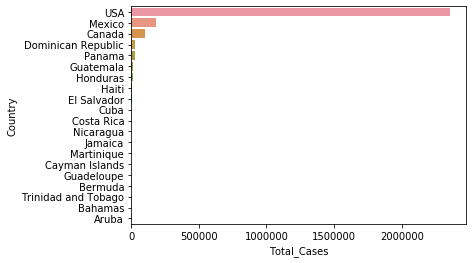

In [88]:
sns.barplot(x='Total_Cases',y= 'Country', data = North_America_Count)

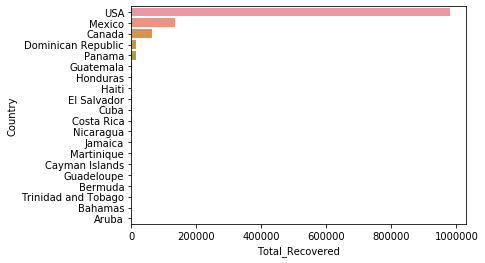

In [89]:
sns.barplot(x='Total_Recovered',y= 'Country', data = North_America_Count)

# Europe's Data

In [90]:
Europe = response[response["Continents"] == 'Europe']
Europe

,Country,Total_Cases,New_Cases,Total_Deaths,New_Deaths,Total_Recovered,Active_Cases,Serious/Critical,Tot_Cases,Deaths,Total_Tests,Tests,Continents,ratio,calculated_Active_Cases
3,Russia,592280,"7,600",8206,95,344416.0,239658.0,2300.0,"4,059",56,17200000.0,"117,862",Europe,1.719665,247864.0
5,UK,304331,NaN,42632,NaN,NaN,NaN,379.0,"4,484",628,7890145.0,"116,241",Europe,inf,NaN
6,Spain,293352,NaN,28323,NaN,NaN,NaN,617.0,"6,274",606,5162909.0,"110,426",Europe,inf,NaN
9,Italy,238499,NaN,34634,NaN,182893.0,20972.0,148.0,"3,944",573,4984370.0,"82,436",Europe,1.304036,55606.0
11,Germany,191575,NaN,8962,NaN,174900.0,7713.0,376.0,"2,287",107,5029696.0,"60,036",Europe,1.095340,16675.0
15,France,160377,NaN,29640,NaN,74372.0,56365.0,715.0,"2,457",454,1384633.0,"21,214",Europe,2.156416,86005.0
22,Belgium,60550,NaN,9696,NaN,16771.0,34083.0,50.0,"5,225",837,1098910.0,"94,828",Europe,3.610399,43779.0
23,Belarus,58505,NaN,346,NaN,37666.0,20493.0,89.0,"6,191",37,861703.0,"91,191",Europe,1.553258,20839.0
24,Sweden,56043,NaN,5053,NaN,NaN,NaN,272.0,"5,550",500,385659.0,"38,193",Europe,inf,NaN
27,Netherlands,49593,NaN,6090,NaN,NaN,NaN,55.0,"2,894",355,517317.0,"30,192",Europe,inf,NaN


In [91]:
Europe_Count = Europe.iloc[1:20]

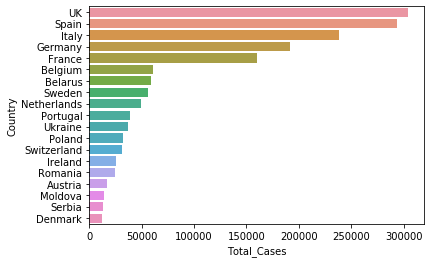

In [92]:
sns.barplot(x='Total_Cases',y= 'Country', data = Europe_Count)

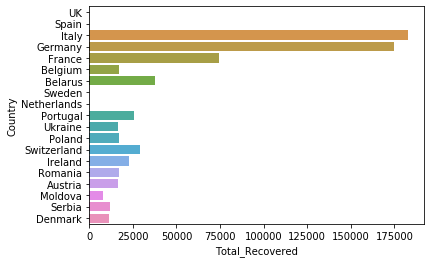

In [93]:
sns.barplot(x='Total_Recovered',y= 'Country', data = Europe_Count)

# Asia's data

In [94]:
Asia = response[response["Continents"] == 'Asia']
Asia

,Country,Total_Cases,New_Cases,Total_Deaths,New_Deaths,Total_Recovered,Active_Cases,Serious/Critical,Tot_Cases,Deaths,Total_Tests,Tests,Continents,ratio,calculated_Active_Cases
4,India,426910,NaN,13703,NaN,237252.0,175955.0,8944.0,309,10,6950493.0,"5,038",Asia,1.799395,189658.0
10,Iran,204952,NaN,9623,NaN,163591.0,31738.0,2887.0,"2,441",115,1422407.0,"16,941",Asia,1.252832,41361.0
12,Turkey,187685,NaN,4950,NaN,160240.0,22495.0,803.0,"2,226",59,2945240.0,"34,932",Asia,1.171274,27445.0
13,Pakistan,181088,"4,471",3590,89,71458.0,106040.0,111.0,820,16,1102162.0,"4,993",Asia,2.534188,109630.0
16,Saudi Arabia,157612,NaN,1267,NaN,101130.0,55215.0,2027.0,"4,529",36,1284653.0,"36,918",Asia,1.558509,56482.0
17,Bangladesh,115786,"3,480",1502,38,46755.0,67529.0,1.0,703,9,630719.0,"3,831",Asia,2.476441,69031.0
20,Qatar,87369,NaN,98,NaN,68319.0,18952.0,221.0,"31,116",35,320792.0,"114,250",Asia,1.278839,19050.0
28,Indonesia,46845,954,2500,35,18735.0,25610.0,0.0,171,9,639385.0,"2,338",Asia,2.500400,28110.0
29,UAE,44925,NaN,302,NaN,32415.0,12208.0,1.0,"4,544",31,3038000.0,"307,270",Asia,1.385932,12510.0
31,Singapore,42313,218,26,NaN,34942.0,7345.0,1.0,"7,234",4,576189.0,"98,508",Asia,1.210950,7371.0


In [95]:
Asia_Count = Asia.iloc[:20]

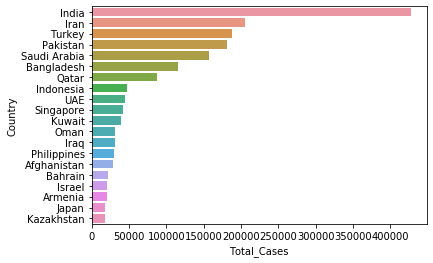

In [96]:
sns.barplot(x='Total_Cases',y='Country',data = Asia_Count)

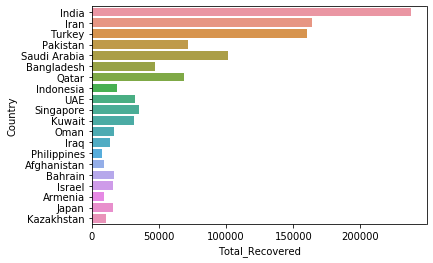

In [97]:
sns.barplot(x='Total_Recovered',y='Country',data = Asia_Count)